In [34]:
import umap as umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
human_activity_recognition: pd.DataFrame = pd.read_csv('data/human_activity_recogniton_with_smartphones/train.csv')
trump_insults: pd.DataFrame = pd.read_csv('data/trump_insults/trump_insult_tweets_2014_to_2021.csv')
google_jobs: pd.DataFrame = pd.read_csv('data/google_jobs/job_skills.csv')
fer2013: pd.DataFrame = pd.read_csv('data/fer2013/fer2013.csv')

In [12]:
human_activity_recognition.shape

(7352, 563)

In [13]:
pd.unique(human_activity_recognition['Activity'])

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [15]:
trump_insults.head()

Unnamed: 0        date          target  \
0           1  2014-10-09  thomas-frieden   
1           2  2014-10-09  thomas-frieden   
2           3  2015-06-16     politicians   
3           4  2015-06-24      ben-cardin   
4           5  2015-06-24      neil-young   

                                              insult  \
0                                               fool   
1                                               DOPE   
2                             all talk and no action   
3  It's politicians like Cardin that have destroy...   
4                                    total hypocrite   

                                               tweet  
0  Can you believe this fool, Dr. Thomas Frieden ...  
1  Can you believe this fool, Dr. Thomas Frieden ...  
2  Big time in U.S. today - MAKE AMERICA GREAT AG...  
3  Politician @SenatorCardin didn't like that I s...  
4  For the nonbeliever, here is a photo of @Neily...

In [17]:
print(trump_insults.shape)
print(len(pd.unique(trump_insults['target'])))
print(len(pd.unique(trump_insults['insult'])))

(10360, 5)
867
6729


In [23]:
print(google_jobs.shape)
print(len(pd.unique(google_jobs['Title'])))
print(len(pd.unique(google_jobs['Category'])))

(1250, 7)
794
23


In [22]:
google_jobs.head()

Company                                              Title  \
0  Google                       Google Cloud Program Manager   
1  Google  Supplier Development Engineer (SDE), Cable/Con...   
2  Google  Data Analyst, Product and Tools Operations, Go...   
3  Google            Developer Advocate, Partner Engineering   
4  Google     Program Manager, Audio Visual (AV) Deployments   

                       Category                          Location  \
0            Program Management                         Singapore   
1  Manufacturing & Supply Chain                   Shanghai, China   
2           Technical Solutions       New York, NY, United States   
3           Developer Relations  Mountain View, CA, United States   
4            Program Management      Sunnyvale, CA, United States   

                                    Responsibilities  \
0  Shape, shepherd, ship, and show technical prog...   
1  Drive cross-functional activities in the suppl...   
2  Collect and analyze data to draw insight and i...   
3  Work one-on-one with the top Android, iOS, and...   
4  Plan requirements with internal customers.\nPr...   

                              Minimum Qualifications  \
0  BA/BS degree or equivalent practical experienc...   
1  BS degree in an Engineering discipline or equi...   
2  Bachelor’s degree in Business, Economics, Stat...   
3  BA/BS degree in Computer Science or equivalent...   
4  BA/BS degree or equivalent practical experienc...   

                            Preferred Qualifications  
0  Experience in the business technology market a...  
1  BSEE, BSME or BSIE degree.\nExperience of usin...  
2  Experience partnering or consulting cross-func...  
3  Experience as a software developer, architect,...  
4  CTS Certification.\nExperience in the construc...

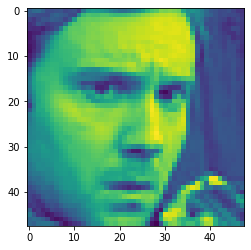

In [36]:
plt.imshow(np.fromstring(fer2013['pixels'].iloc[0], sep = ' ').reshape(48,48))

[-0.11297844 -0.11301363 -0.11305141 ... -0.11307876 -0.11302172
 -0.11297098]
[-0.53280186 -0.53285538 -0.53291597 ... -0.53438568 -0.53420877
 -0.53404585]
[-0.0812022  -0.08075453 -0.08029994 ... -0.14231403 -0.13824454
 -0.13443271]


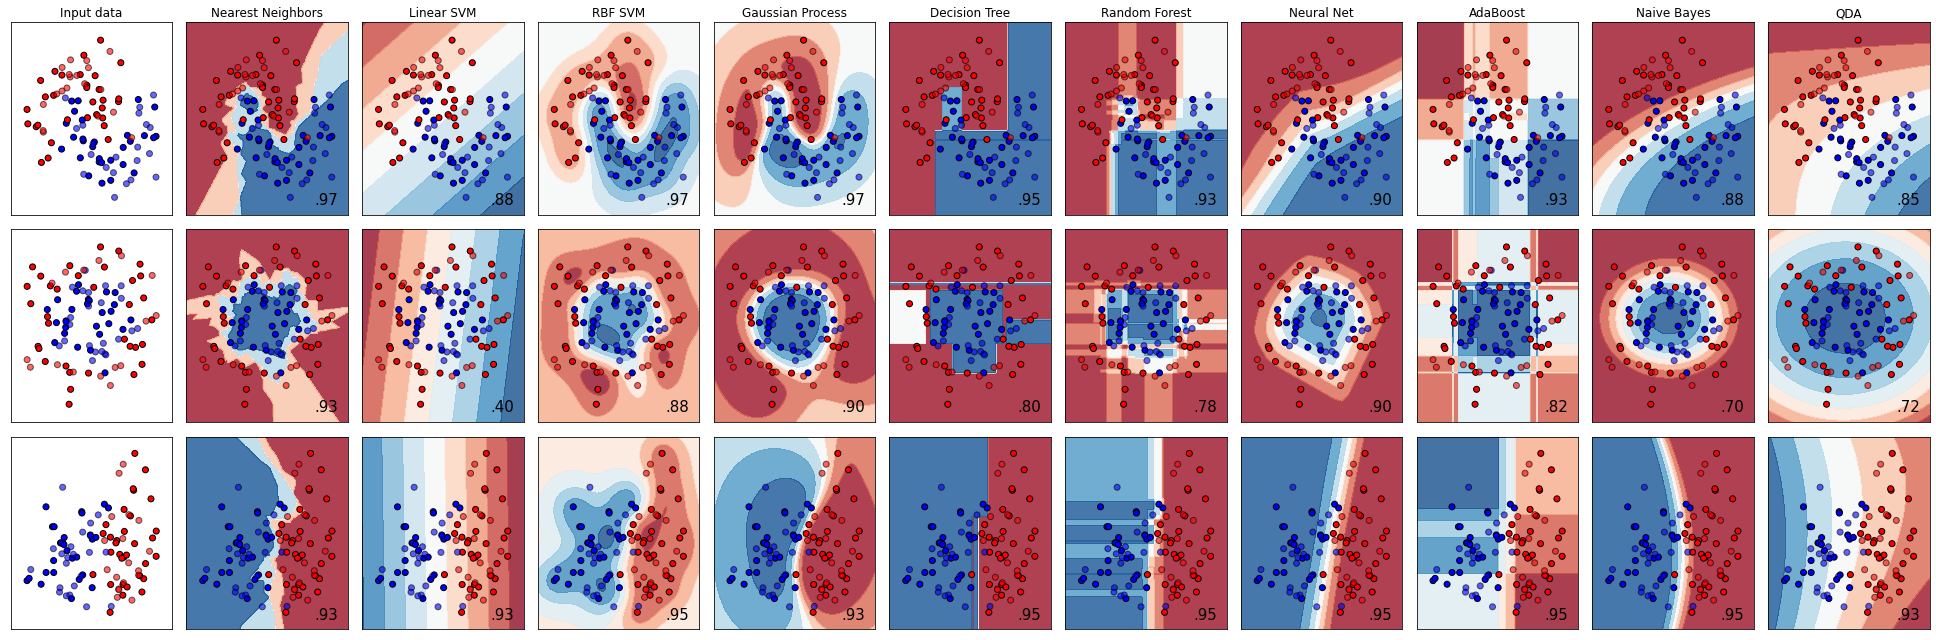

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    # print(X_train, X_test, y_train, y_test)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        if name == 'RBF SVM':
            print(Z)
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()